In [1]:
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
import tensorflow as tf
tf.__version__
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('customer_behaviour_data.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [5]:
df.size

140000

In [6]:
df.shape

(10000, 14)

In [7]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [8]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

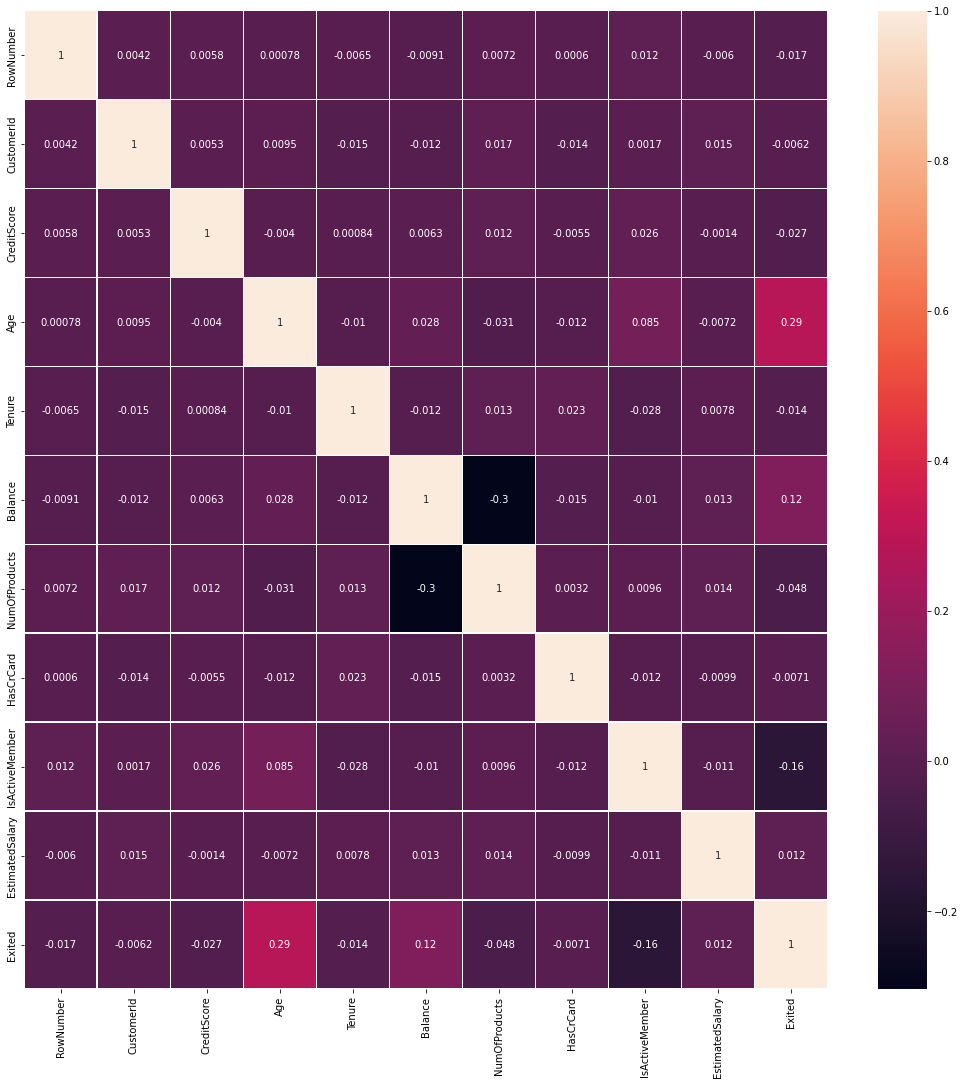

In [9]:
fig, ax = plt.subplots(figsize=(18,18))         # Sample figsize in inches
sns.heatmap(df.corr(), annot=True, linewidths=.5, ax=ax)
#sns.heatmap(df.corr(),annot=True

### Seperating features and target label

In [10]:
from pandas.core.frame import DataFrame

# feature_names = ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard','IsActiveMember', 'EstimatedSalary']
features = df.iloc[:, 3:-1].values
target = df.iloc[:, -1].values
labels = df.iloc[:, -1].values

print(features[1])

[608 'Spain' 'Female' 41 1 83807.86 1 0 1 112542.58]


In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
features[:, 2] = le.fit_transform(features[:, 2])

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
features = np.array(ct.fit_transform(features))

In [12]:
# Initialzing empty lists to append all model's name and corresponding name
acc = []
model = []

print(features[2])

[1.0 0.0 0.0 502 0 42 8 159660.8 3 1 0 113931.57]


In [13]:
# Splitting into train and test data

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

# Decision Tree

In [14]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  85.8
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1617
           1       0.84      0.32      0.46       383

    accuracy                           0.86      2000
   macro avg       0.85      0.65      0.69      2000
weighted avg       0.86      0.86      0.83      2000



In [15]:
from sklearn.model_selection import cross_val_score

In [16]:
# Cross validation score (Decision Tree)
score = cross_val_score(DecisionTree, features, target,cv=5)

In [17]:
score

array([0.853 , 0.8575, 0.846 , 0.8605, 0.845 ])

# Guassian Naive Bayes

In [18]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  0.797
              precision    recall  f1-score   support

           0       0.81      0.97      0.89      1617
           1       0.32      0.05      0.09       383

    accuracy                           0.80      2000
   macro avg       0.57      0.51      0.49      2000
weighted avg       0.72      0.80      0.73      2000



In [19]:
# Cross validation score (NaiveBayes)
score = cross_val_score(NaiveBayes,features,target,cv=5)
score

array([0.786 , 0.7815, 0.789 , 0.784 , 0.784 ])

# Support Vector Machine (SVM)

In [20]:
from sklearn.svm import SVC
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler
# fit scaler on training data
norm = MinMaxScaler().fit(Xtrain)
X_train_norm = norm.transform(Xtrain)
# transform testing dataabs
X_test_norm = norm.transform(Xtest)
SVM = SVC(kernel='poly', degree=3, C=1)
SVM.fit(X_train_norm,Ytrain)
predicted_values = SVM.predict(X_test_norm)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  0.8545
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      1617
           1       0.82      0.31      0.45       383

    accuracy                           0.85      2000
   macro avg       0.84      0.65      0.68      2000
weighted avg       0.85      0.85      0.83      2000



In [21]:
# Cross validation score (SVM)
score = cross_val_score(SVM,features,target,cv=5)
score

array([0.796 , 0.796 , 0.7965, 0.7965, 0.7965])

# Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  0.7995
              precision    recall  f1-score   support

           0       0.81      0.98      0.89      1617
           1       0.31      0.04      0.07       383

    accuracy                           0.80      2000
   macro avg       0.56      0.51      0.48      2000
weighted avg       0.72      0.80      0.73      2000



In [23]:
# Cross validation score (Logistic Regression)
score = cross_val_score(LogReg,features,target,cv=5)
score

array([0.7915, 0.791 , 0.7905, 0.789 , 0.7885])

# Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.8535
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1617
           1       0.71      0.39      0.51       383

    accuracy                           0.85      2000
   macro avg       0.79      0.68      0.71      2000
weighted avg       0.84      0.85      0.84      2000



In [25]:
# Cross validation score (Random Forest)
score = cross_val_score(RF,features,target,cv=5)
score

array([0.8545, 0.8655, 0.8535, 0.863 , 0.854 ])

# XGBoost

In [26]:
import xgboost as xgb
XB = xgb.XGBClassifier().fit(Xtrain,Ytrain)

predicted_values = XB.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('XGBoost')
print("XGBoost's Accuracy is: ", x)

XGBoost's Accuracy is:  0.862


In [27]:
# Cross validation score (XGBoost)
score = cross_val_score(XB,features,target,cv=5)
score

array([0.862 , 0.8675, 0.8565, 0.8715, 0.859 ])

In [28]:
# feature scaling is a must for deep learning...we must just scale every column..even if they have 1/0/short range values
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Xtrain = sc.fit_transform(Xtrain)
Xtest = sc.transform(Xtest)# dont fit here....it must be fitted to train range
# cuz later u have to transform input and for that gotta us ethis same sc

# Artficial Neural Networks

In [29]:
# initalizing the ANN as a sequence of layers
ann = tf.keras.models.Sequential()

# adding first layer of neurons
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
# dense layer as in a fully connected layer i guess
# one neuron per one input feature
# no thumb rule for number of neurons per layer
# its purely experimentation
# tried several numbers...6 was good
# activation function...rectifier...as told in intuition..its an important function

ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
# only one neuron to get input
# binary output...so sigmoid
# if we have three classes in input rather than two as per given problem
# then we can have three neurons..one hot encode of the output value
# sigmoid function gives probability of 1 or 0

# optimizer...best one is adam..the best one to perform stochastic gradietnt descent
# optmizer updates the weights..(adam fucntion through stochastic gradient descent)
# loss fucntion...wen ur doing binary classification loss fucntion must always be the given one
# for non binary...replace binary with categorical..in the given parameter
# ANN for regresion...see their free course
# can take several value of metrics thats y there is a list
# accurracy is the main one..hence took it..we want more accuracy
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# no of rows to use current weights on before adjusting the weights after comparision is the batch size
# can choose any number for apochs..but ya make sure its some big number like 100 atleast
ann.fit(Xtrain, Ytrain, batch_size = 32, epochs = 100)

Epoch 1/100
250/250 [==============================] - 1s 2ms/step - loss: 0.5424 - accuracy: 0.7601
Epoch 2/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4679 - accuracy: 0.7935
Epoch 3/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4448 - accuracy: 0.7965
Epoch 4/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4310 - accuracy: 0.8069
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4196 - accuracy: 0.8175
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4101 - accuracy: 0.8244
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3999 - accuracy: 0.8304
Epoch 8/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3863 - accuracy: 0.8403
Epoch 9/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3723 - accuracy: 0.8474
Epoch 10/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3618 - accura

In [30]:
y_pred = ann.predict(Xtest)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), Ytest.reshape(len(Ytest),1)),1))

[[0 1]
 [0 1]
 [0 1]
 ...
 [1 1]
 [0 1]
 [0 0]]


In [31]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Ytest, y_pred)
print(cm)

[[1566   51]
 [ 229  154]]


In [32]:
acc.append(accuracy_score(Ytest, y_pred))
model.append('ANN')

## Accuracy Comparison

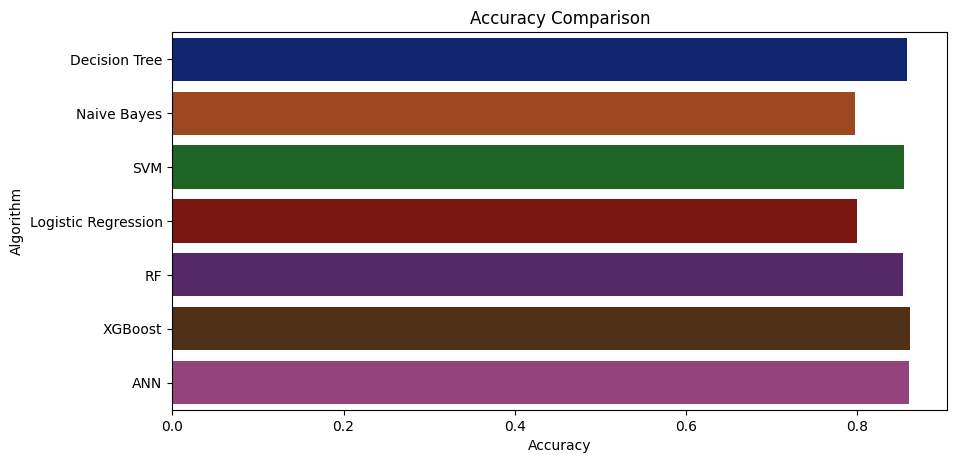

In [33]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [34]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Decision Tree --> 0.858
Naive Bayes --> 0.797
SVM --> 0.8545
Logistic Regression --> 0.7995
RF --> 0.8535
XGBoost --> 0.862
ANN --> 0.86


In [35]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [36]:
import shap

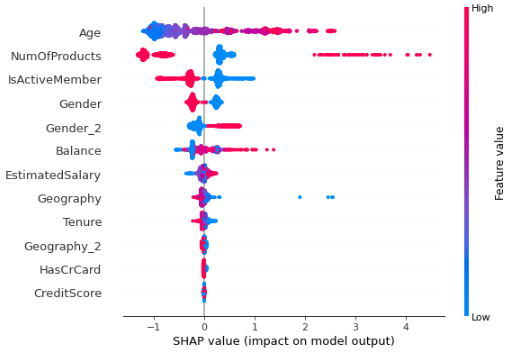

In [37]:
# Create object that can calculate shap values
explainer = shap.TreeExplainer(XB)

# calculate shap values. This is what we will plot.
# Calculate shap_values for all of val_X rather than a single row, to have more data for plot.
shap_values = explainer.shap_values(Xtest)
# shap_values = np.delete(shap_values, 4, 1)
# shap_values = np.delete(shap_values, 9, 1)
# Xtest2 = np.delete(Xtest, 4, 1)
# Xtest2 = np.delete(Xtest2, 9, 1)

# Make plot. Index of [1] is explained in text below.
shap.summary_plot(shap_values, Xtest, feature_names = ['Geography_2', 'Gender_2', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'])